# Superstore Dataset
## Progetto Data Science 2022 - Brocchi Martina

Il dataset superstore contiene i dati relativi alle vendite effettuate da un superstore all'interno degli Stati Uniti.
A ogni ordine sono associate informazioni riguardanti il cliente, la destinazione dell'ordine e i prodotti acquistati (ad esempio la loro categoria, la quantità e i profitti derivati dalla vendita del prodotto).

### Obiettivo: identificare le migliori strategie di vendita per il superstore
* Analizzare le vendite e dei profitti del superstore
* Identificare le categorie e le sotto-categorie di prodotti più vendute e quelle con i maggiori profitti
* Identificare le regioni e i paesi da cui derivano i profitti maggiori
* Analizzare l'andamento delle vendite nel tempo

In [39]:
from matplotlib import pyplot as plt
import scipy.stats as stats
import pandas as pd
import pycountry
import plotly.express as px
import seaborn as sns
import numpy as np

## Import dataset e analisi caratteristiche
Per prima cosa andiamo a importare il dataset e analizziamo alcune sue caratteristiche principali.

In [40]:
superstore = pd.read_csv('Sample-Superstore.csv', encoding='ISO-8859-1')
superstore.shape

(9994, 21)

In [41]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Andiamo a suddividere features qualitative e features quantitative e andiamo a utilizzare la funzione describe per ottenere informazioni su di esse.

In [42]:
superstore_quantitative = superstore[['Row ID','Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']]
superstore_qualitative = superstore[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']]
superstore_quantitative.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [43]:
superstore_qualitative.describe()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [44]:
print(superstore['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


Dall'analisi delle features qualitative possiamo evincere come il dataset contenga informazioni su 5009 ordini, effettuati per 793 clienti diversi. Tutti gli ordini sono stati inviati negli Stati Uniti, con una maggiore frequenza nell'ovest del paese, in particolare in California.

Le categorie di prodotti spediti sono tre: Technology, Office Supplies, Furniture

Inoltre, come possiamo osservare dai valori della riga count di entrambe le tabelle ottenute, non abbiamo valori nulli all'interno del dataset. Andiamo a confermare tale osservazione tramite la funzione isnull().

In [45]:
superstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Analisi vendite e profitti del superstore
Iniziamo l'analisi delle vendite e dei profitti del superstore considerando i prodotti venduti suddivisi per categoria e sotto-categoria.
Per prima cosa andiamo a rappresentare tramite un grafico a barre il totale dei prezzi di vendita e il totale dei profitti per le diverse categorie.

<Figure size 432x288 with 0 Axes>

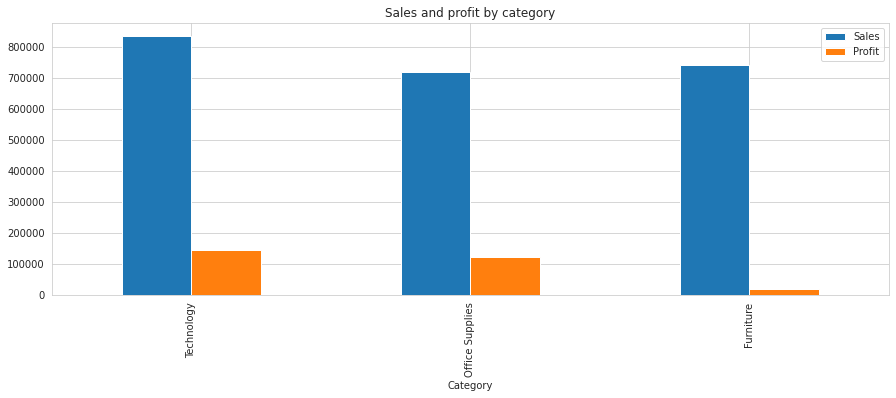

In [46]:
superstore_category = superstore.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)

plt.figure()
superstore_category.plot(kind='bar', figsize=(15,5))
plt.title("Sales and profit by category")
plt.show()

Dal grafico a barre possiamo evincere come le tre categorie di prodotti abbiano un totale di vendite simile, nonostante la categoria di prodotti Technology sia quella con le vendite maggiori.
Tale categoria è anche quella da cui derivano i profitti più alti.

La categoria Furniture ha vendite simili alle altre due, tuttavia da essa derivano i profitti minori.
Tramite il rapporto tra profitto e prezzo di vendita possiamo calcolare il margine di profitto, che indica la percentuale di guadagno dell'azienda rispetto alle spese.

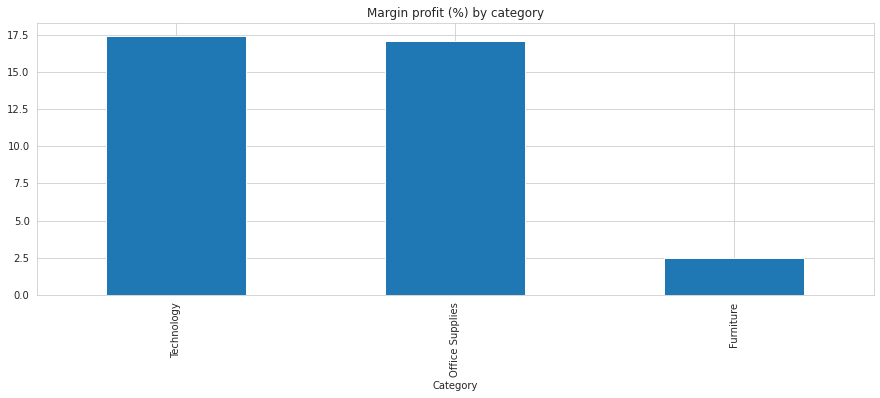

In [47]:
margin_profit_category = np.round(((superstore_category.Profit / superstore_category.Sales) * 100),3)

plt.plot()
margin_profit_category.plot(kind='bar', figsize=(15,5))
plt.title("Margin profit (%) by category")
plt.show()

Le categorie _Technology_ e _Office Supplies_ hanno un margine di profitto dalle vendite pari al 17% circa, mentre la categoria _Furniture_ ha un margine di profitto molto basso, circa pari al 2%.
Andiamo a effettuare la stessa analisi anche per quanto riguarda la suddivisione dei prodotti in sotto-categorie

<Figure size 432x288 with 0 Axes>

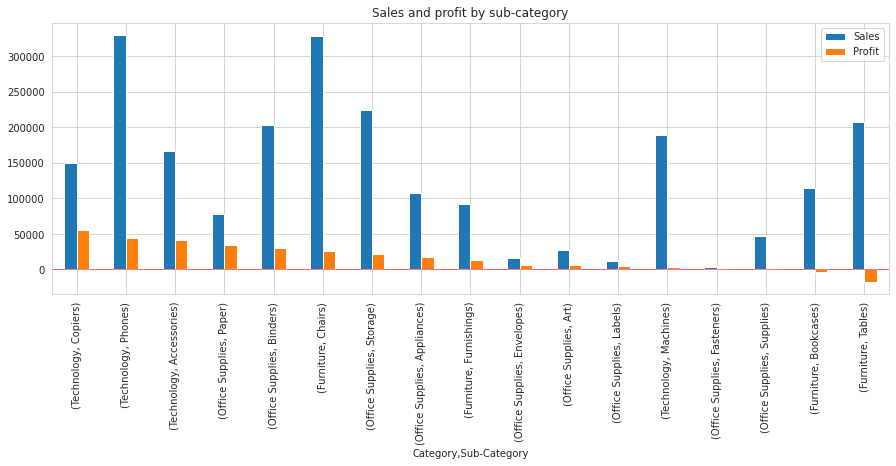

In [48]:
superstore_sub_category = superstore.groupby(['Category','Sub-Category'])[['Sales', 'Profit']].sum()

plt.figure()
superstore_sub_category.sort_values('Profit', ascending=False).plot(kind='bar', figsize=(15,5))
plt.axhline(y=0, color='r', linestyle='-', lw=0.5)
plt.title("Sales and profit by sub-category")
plt.show()

Le sotto-categorie _phones_ e _chairs_ sono quelle con le vendite maggiori. La sotto-categoria _phones_ è anche la seconda con i profitti maggiori, subito dopo alla sotto-categoria _copiers_.
Queste ultime sotto-categorie appartengono entrambe alla categoria _Technology_.

Dal grafico a barre possiamo inoltre notare come ci siano sotto-categorie con profitti nulli, come la sotto-categoria _supplies_, o addirittura negativi, come nel caso delle sotto-categorie _bookcases_ e _tables_. Quest'ultime appartengono entrambe alla categoria _Furniture_, la categoria con i profitti minori.

Le sotto-categorie con le vendite minori appartengono invece tutte alla categoria _Office Supplies_.

Anche in questo caso andiamo a calcolare i valori del margine di profitto

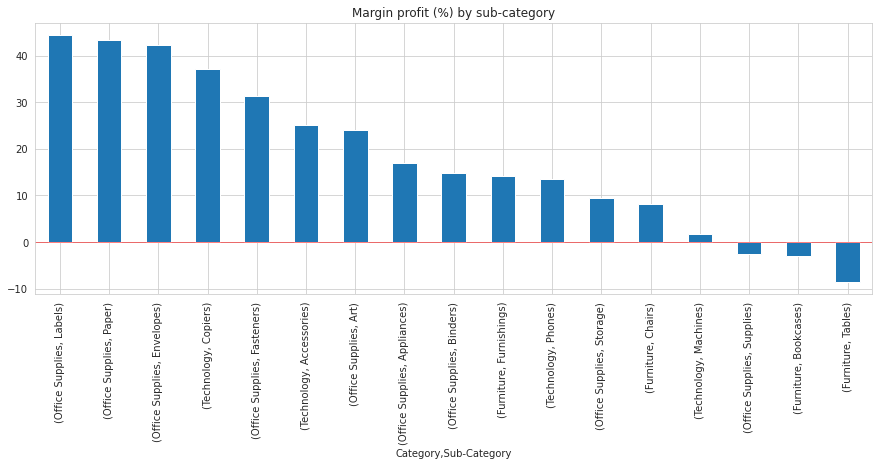

In [49]:
profit_margin_sub_category = np.round(((superstore_sub_category.Profit / superstore_sub_category.Sales) * 100), 3)

plt.figure()
profit_margin_sub_category.sort_values(ascending=False).plot(kind='bar', figsize=(15,5))
plt.axhline(y=0, color='r', linestyle='-', lw=0.5)
plt.title("Margin profit (%) by sub-category")
plt.show()

Nonostante le sotto-categorie appartenenti alla categoria _Office Supplies_ abbiano le vendite minori, il loro margine di profitto è tra i più alti.
Questo poiché i profitti di tali sotto-categorie sono talvolta nulli ma mai negativi, e spesso si avvicinano al valore delle vendite.

Proviamo ora ad analizzare i profitti delle sotto-categorie _phones_ (vendite e profitti maggiori) e _tables_ (profitti e margini di profitto minori) per regione del paese


In [50]:
def profit_subCatByRegion(subCats, n):
    plt.figure()
    for i,subCat in enumerate(subCats):
        plt.subplot(1,n,i+1)
        A = superstore[superstore['Sub-Category'] == subCat]
        A.groupby('Region')['Profit'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(40,10))
        plt.axhline(y=0, color='r', linestyle='-', lw=1)
        plt.title("Profit by region in the sub-category of "+subCat)
    plt.show()

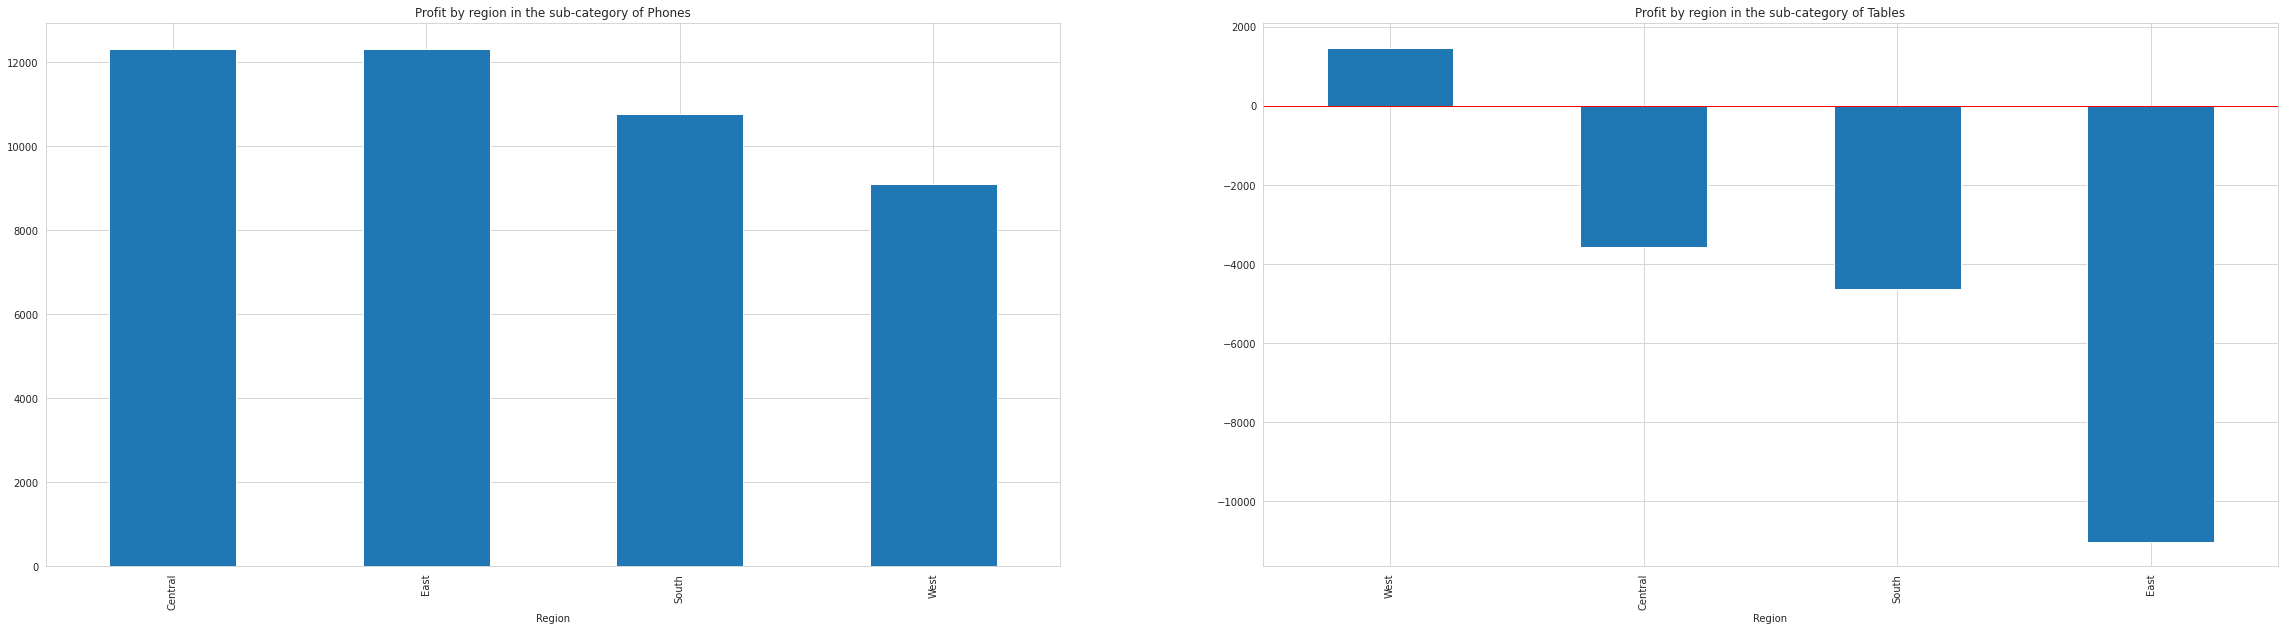

In [51]:
subCats = ['Phones','Tables']
profit_subCatByRegion(subCats, len(subCats))

Come possiamo osservare le perdite maggiori nella sotto-categoria _tables_ derivano dalle vendite effettuate nell'est del paese, mentre l'unica regione che ha portato dei profitti è quella dell'ovest del paese.
Tuttavia, nel caso della sotto-categoria _phones_ dall'ovest del paese derivano i profitti minori.

Queste osservazioni ci portano a formulare una domanda: la distribuzione dei profitti per categoria varia all'interno delle diverse regioni degli Stati Uniti?

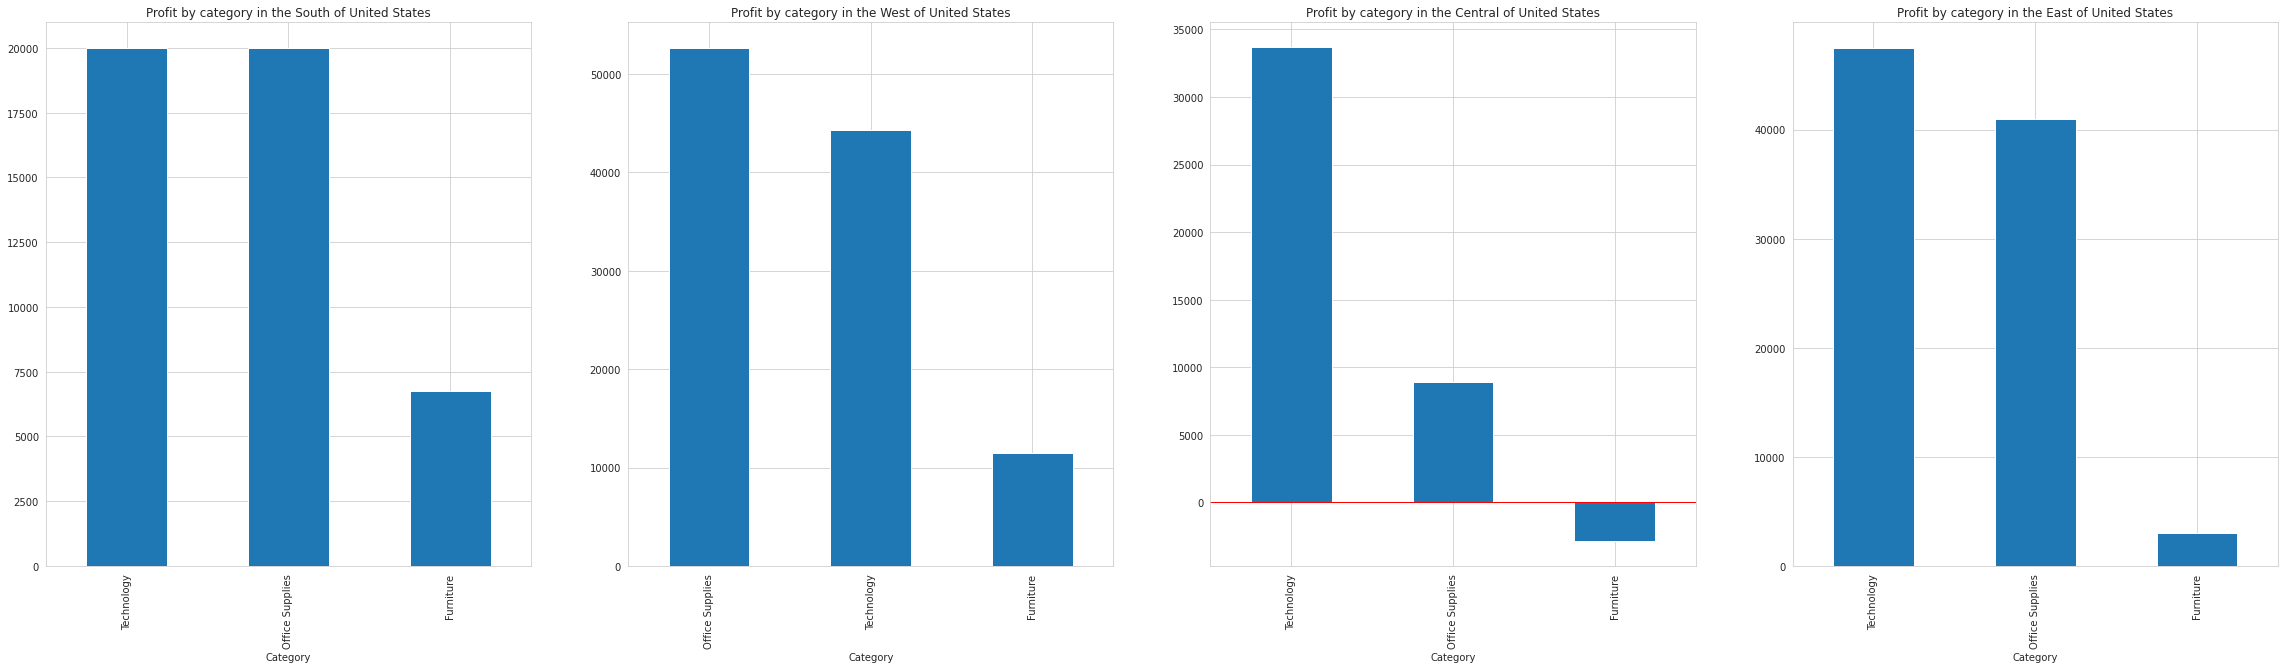

In [52]:
plt.figure()
for i,reg in enumerate(superstore['Region'].unique()):
    A = superstore[superstore['Region'] == reg].groupby('Category')['Profit'].sum()
    plt.subplot(1,4,i+1)
    A.sort_values(ascending=False).plot(kind='bar', figsize=(40,10))
    plt.axhline(y=0, color='r', linestyle='-', lw=1)
    plt.title("Profit by category in the "+reg+" of United States")
plt.show()

Dai grafici è possibile evincere come la categoria _Technology_ sia quella con i profitti maggiori in tutte le regioni eccetto quella dell'ovest degli Stati Uniti, in cui la categoria con i maggiori profitti è _Office Supplies_.

Possiamo effettuare un test del chi-quadrato per avere una verifica formale sulla distribuzione dei profitti delle 3 categorie nelle diverse regioni del paese.
* H$_{0}$ = la proporzione tra i profitti delle categorie è la stessa in ogni regione
* H$_{a}$ = la proporzione tra i profitti delle categorie non è la stessa in ogni regione

In [53]:
exp = np.divide(superstore.groupby('Category')['Profit'].sum(), superstore['Profit'].sum())

for reg in superstore.Region.unique():
    A = superstore[superstore['Region']==reg][0:999]
    obs = np.divide(A.groupby('Category')['Profit'].sum(), A['Profit'].sum())
    chi_square, p_value = stats.chisquare(f_obs=obs, f_exp=exp)
    print("Chi-quadrato "+reg+":", chi_square)
    print("P-value "+reg+":",p_value)

Chi-quadrato South: 0.47676461843295687
P-value South: 0.7879014115351579
Chi-quadrato West: 0.06714001817319584
P-value West: 0.9669872109702219
Chi-quadrato Central: 0.9323231871607129
P-value Central: 0.6274058910910576
Chi-quadrato East: 0.29662524841606713
P-value East: 0.8621615402377379


Eseguendo il test del chi-quadrato con livello di significatività pari a 0.05 e livello di confidenza 0.95 otteniamo che per tutte le regioni il p-value ottenuto è maggiore del livello di significatività fissato. Non possiamo quindi rigettare in nessun caso l'ipotesi nulla, in favore del fatto che la distribuzione dei profitti delle diverse categorie è uguale a quella attesa in tutte le regioni.

Un'altra osservazione che possiamo ricavare dai profitti delle categorie nelle varie regioni è il valore della somma dei profitti: nel caso dell'ovest la categoria con i maggiori profitti ha un valore che supera 50000 dollari.
Nel caso delle altre regioni i profitti sono più bassi; in particolare nel sud degli Stati Uniti la categoria con i profitti totali maggiori ha un valore di 20000 dollari.
Questo ci porta a pensare che i profitti totali nell'ovest degli Stati Uniti siano più alti di quelle delle altre regioni.

Andiamo ad analizzare i profitti totali per regione degli Stati Uniti.

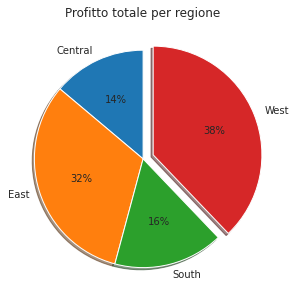

In [54]:
superstore_region = superstore.groupby('Region')['Profit'].sum()

plt.figure(figsize=(15,5))
plt.pie(superstore_region, labels=superstore_region.keys(), startangle = 90, autopct = "%1.0f%%", explode = [0, 0, 0, 0.1], shadow = True)
plt.title("Profitto totale per regione")

plt.show()

La regione con i profitti maggiori è effettivamente quella dell'ovest degli Stati Uniti (38% dei profitti totali), seguita subito dall'est del paese (32% dei profitti totali).
Nella parte centrale e nel sud del paese i profitti sono pressoché dimezzati rispetto alle altre due regioni. Questo potrebbe essere dovuto a una combinazione di due fattori: la presenza di un numero inferiore di ordini in quella regione o la maggiore presenza di ordini con profitti in negativo.

Andiamo più in particolare ad analizzare i profitti per singolo stato, visualizzando i dati tramite una mappa del paese e tramite un grafico a barre.

In [55]:
codes = np.empty_like(superstore['State'])
tot_profit = np.empty_like(superstore['Profit'])

for elem in superstore['State'].unique(): 
    codes[np.where(superstore['State'] == elem)] = pycountry.subdivisions.lookup(elem).code[3:5]
    tot_profit[np.where(superstore['State']==elem)] = superstore.groupby('State')['Profit'].sum().get(elem)

codes[np.where(codes=='12')] = 'MT'
superstore['State Code'] = codes
superstore['Total profit by State'] = tot_profit

fig = px.choropleth(superstore,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total profit by State',
                    color_continuous_scale="Viridis_r",
                    )
fig.show()

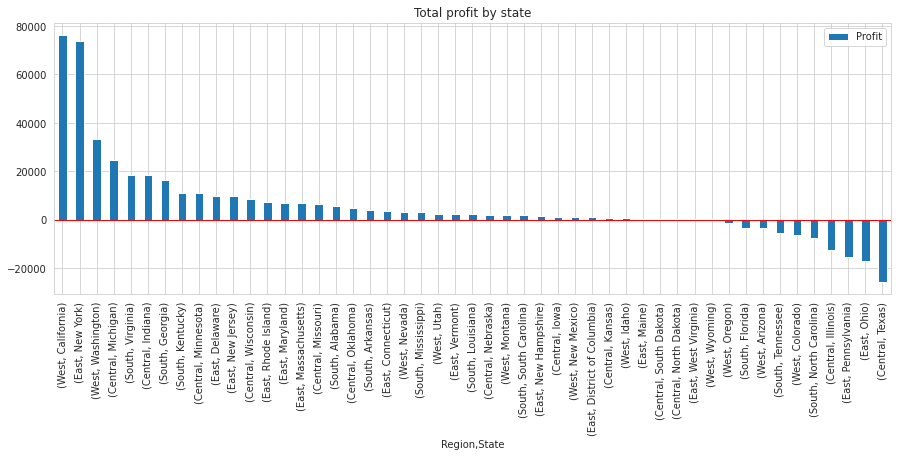

In [56]:
superstore.groupby(['Region', 'State'])[['Profit']].sum().sort_values('Profit', ascending=False).plot(kind='bar', figsize=(15,5))
plt.axhline(y=0, color='r', linestyle='-', lw=1)
plt.title("Total profit by state")
plt.show()

Gli stati da cui deriva il maggior profitto sono California, New York e Washington, che appartengono alle regioni est e ovest del paese.
Le perdite maggiori si verificano in Texas, stato appartenente alla regione centrale degli Stati Uniti.

Andiamo ad analizzare la distribuzione delle vendite per categoria all'interno di questi stati.

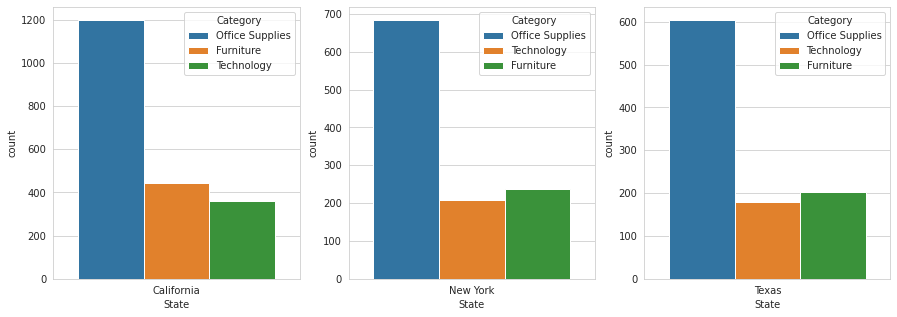

In [57]:
california = np.where(superstore['State']=='California')
newYork = np.where(superstore['State']=='New York')
texas = np.where(superstore['State']=='Texas')

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(x="State", hue='Category', data=superstore.iloc[california])
plt.subplot(132)
sns.countplot(x="State", hue='Category', data=superstore.iloc[newYork])
plt.subplot(133)
sns.countplot(x="State", hue='Category', data=superstore.iloc[texas])
plt.show()

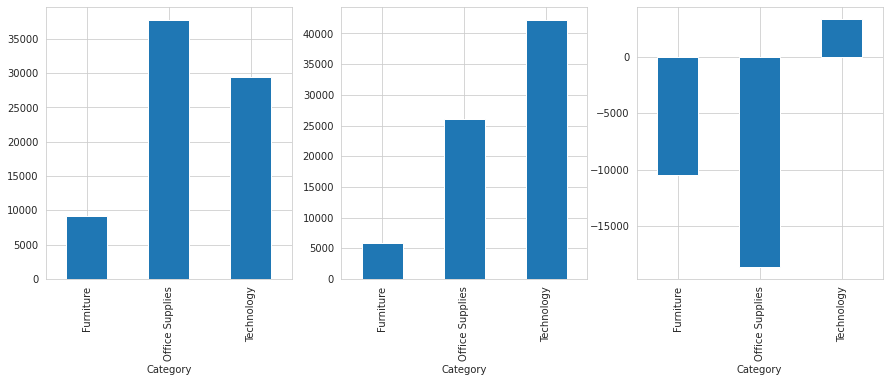

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(131)
superstore.iloc[california].groupby('Category')['Profit'].sum().plot(kind='bar')
plt.subplot(132)
superstore.iloc[newYork].groupby('Category')['Profit'].sum().plot(kind='bar')
plt.subplot(133)
superstore.iloc[texas].groupby('Category')['Profit'].sum().plot(kind='bar')
plt.show()

## Correlazione tra profitto, prezzo di vendita e sconto
Proviamo a cercare una correlazione tra prezzo di vendita, profitto e sconto per capire da cosa possano derivare i profitti negativi.

In [59]:
superstore[['Profit', 'Sales', 'Discount']].corr(method='pearson')

,Profit,Sales,Discount
Profit,1.000000,0.479064,-0.219487
Sales,0.479064,1.000000,-0.028190
Discount,-0.219487,-0.028190,1.000000


Possiamo notare come esista una correlazione positiva tra il prezzo di vendita e i profitti, mentre esista una correlazione negativa tra lo sconto e i profitti.
Tra il prezzo di vendita e lo sconto esiste una correlazione negativa molto debole, quasi nulla.
Non esiste invece correlazione tra la modalità di spedizione e le altre variabili.

Questo ci fa ipotizzare che lo sconto vada a impattare sui profitti dell'azienda, facendo sì che possano andare anche in negativo.
Questa ipotesi viene confermata dalla correlazione quasi nulla tra sconto e prezzo di vendita: l'applicazione dello sconto non implica un aumento significativo del prezzo di vendita e va a diminuire il margine di profitto dell'azienda.

Proviamo a visualizzare questo trend tramite un grafico a dispersione

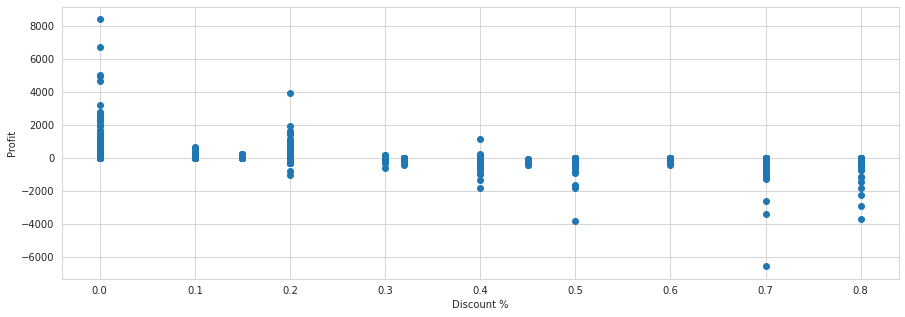

In [60]:
plt.figure(figsize=(15,5))
plt.scatter(superstore['Discount'], superstore['Profit'])
plt.xlabel('Discount %')
plt.ylabel('Profit')
plt.show()

## Tipologia di clienti e modalità di spedizione
Una volta stabilita la presenza di una correlazione negativa tra sconti applicati e profitto dell'azienda, cerchiamo di capire se tali sconti siano applicati ad una particolare categoria di clienti o ad una particolare tipologia di spedizioni.

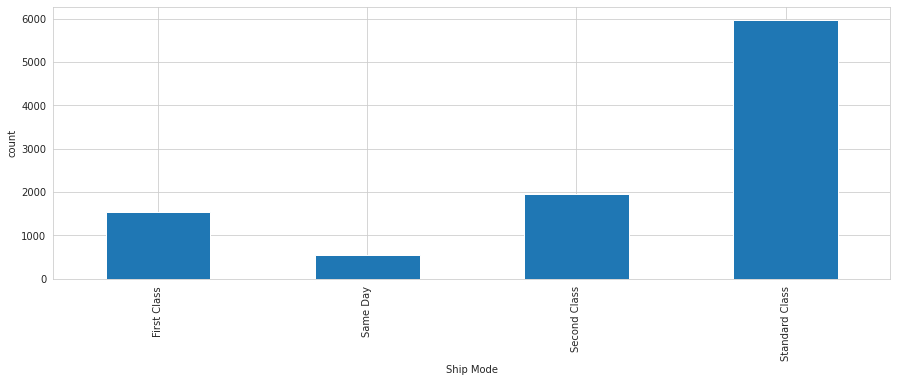

In [61]:
plt.figure()
superstore.groupby('Ship Mode')['Order ID'].count().plot(kind='bar', figsize=(15,5))
plt.ylabel("count")
plt.show()

Esistono 4 tipologie di spedizione. La modalità più popolare è la _Standard Class_, seguita da _Second Class_, _First Class_ e _Same Day_.
Andiamo ad associare a ognuna un valore, che ci permette di calcolare la correlazione con il profitto.

In [62]:
superstore.loc[superstore['Ship Mode'] == 'Same Day', 'Ship Mode' ] = 1
superstore.loc[superstore['Ship Mode'] == 'First Class', 'Ship Mode' ] = 2
superstore.loc[superstore['Ship Mode'] == 'Second Class', 'Ship Mode' ] = 3
superstore.loc[superstore['Ship Mode'] == 'Standard Class', 'Ship Mode' ] = 4
superstore = superstore.astype({'Ship Mode': np.int64})

Effettuiamo la stessa operazione con la tipologia di cliente

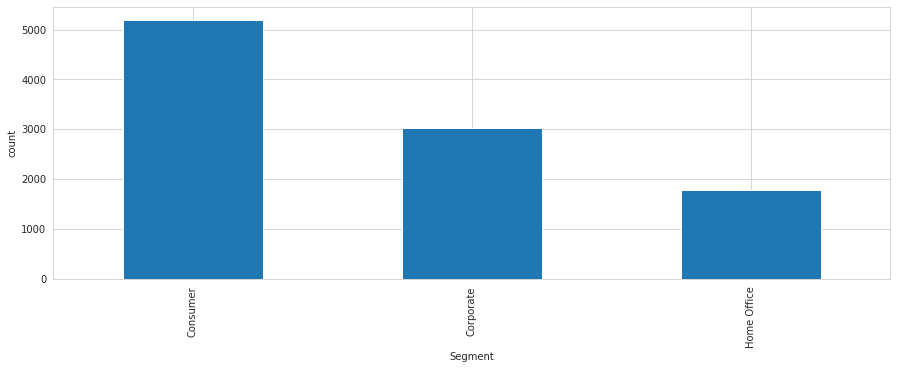

In [63]:
plt.figure()
superstore.groupby('Segment')['Order ID'].count().plot(kind='bar', figsize=(15, 5))
plt.ylabel("count")
plt.show()

Più del 50% delle vendite derivano dai normali consumatori, il 30% derivano dalle aziende mentre la restante parte deriva dalla tipologia di cliente _Home Office_, ossia clienti che acquistano prodotti per lavorare da casa.
Convertiamo anche in questo caso il nome della tipologia in un identificativo.

In [64]:
superstore.loc[superstore['Segment'] == 'Consumer', 'Segment' ] = 1
superstore.loc[superstore['Segment'] == 'Corporate', 'Segment' ] = 2
superstore.loc[superstore['Segment'] == 'Home Office', 'Segment' ] = 3
superstore = superstore.astype({'Segment': np.int64})

Possiamo ora calcolare la correlazione tra profitti, tipologia di spedizione e tipologia di cliente

In [65]:
superstore[['Profit', 'Sales', 'Discount', 'Quantity', 'Ship Mode', 'Segment']].corr(method='pearson')

,Profit,Sales,Discount,Quantity,Ship Mode,Segment
Profit,1.000000,0.479064,-0.219487,0.066253,-0.005767,0.013355
Sales,0.479064,1.000000,-0.028190,0.200795,-0.003224,0.010866
Discount,-0.219487,-0.028190,1.000000,0.008623,0.007337,-0.016679
Quantity,0.066253,0.200795,0.008623,1.000000,0.024864,0.008130
Ship Mode,-0.005767,-0.003224,0.007337,0.024864,1.000000,0.003023
Segment,0.013355,0.010866,-0.016679,0.008130,0.003023,1.000000


Il calcolo della correlazione tra queste categorie non ci fornisce alcuna informazione utile in quanto la correlazione risulta essere nulla tra tutte le variabili.
Non esiste quindi una modalità di spedizione o una tipologia di clienti che consentono all'azienda di avere un margine di profitto maggiore.

In [66]:
print((superstore.groupby('Segment')['Profit'].sum() / superstore.groupby('Segment')['Sales'].sum()) *100, '\n')
print((superstore.groupby('Ship Mode')['Profit'].sum() / superstore.groupby('Ship Mode')['Sales'].sum()) *100)

Segment
1    11.548050
2    13.025506
3    14.034269
dtype: float64 

Ship Mode
1    12.380315
2    13.934513
3    12.510331
4    12.081202
dtype: float64


Correlazione tra tipologia di clienti e sconto

## Andamento delle vendite nel tempo
Per prima cosa andiamo a convertire le date nel tipo corretto.

In [67]:
superstore['Ship Date']= pd.to_datetime(superstore['Ship Date'], format='%m/%d/%Y')

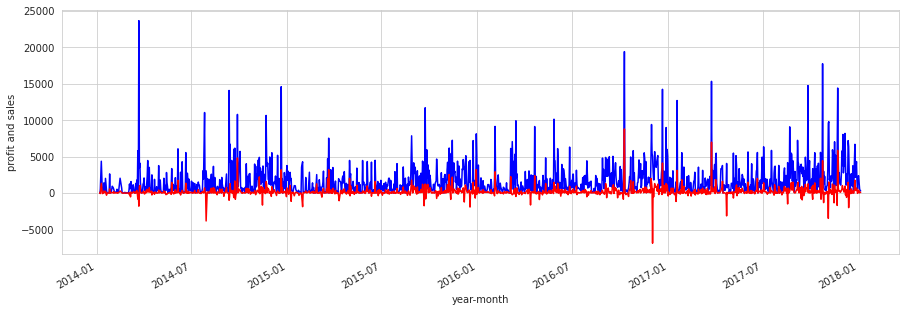

In [68]:
plt.figure(figsize=(15,5))
superstore.groupby('Ship Date')['Sales'].sum().plot(color='b')
superstore.groupby('Ship Date')['Profit'].sum().plot(color='r')
plt.xlabel('year-month')
plt.ylabel('profit and sales')
plt.show()

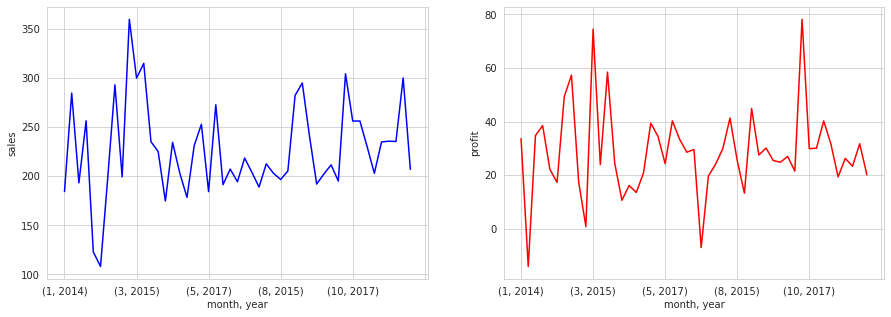

In [70]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
superstore.groupby([superstore['Ship Date'].dt.month, superstore['Ship Date'].dt.year])['Sales'].mean().plot(color='b')
plt.xlabel('month, year')
plt.ylabel('sales')
plt.subplot(122)
superstore.groupby([superstore['Ship Date'].dt.month, superstore['Ship Date'].dt.year])['Profit'].mean().plot(color='r')
plt.xlabel('month, year')
plt.ylabel('profit')
plt.show()

## Conclusioni
Possiamo concludere ...